In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [123]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [124]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [125]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [126]:
modified_df = df.loc[:,['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [127]:
modified_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# Visualization among data

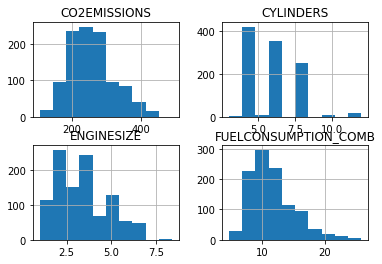

In [128]:
viz = df.loc[:,['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

# Plots to check the linearity

## Independent Variables: Cylindes, Engine Size, Fuel Consumption
## Dependent: CO2 Emissions

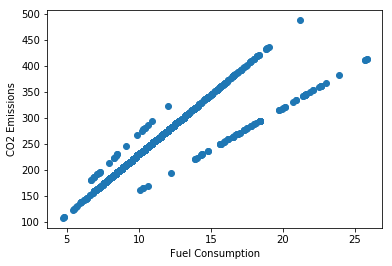

In [129]:
plt.scatter(modified_df.FUELCONSUMPTION_COMB, modified_df.CO2EMISSIONS)
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

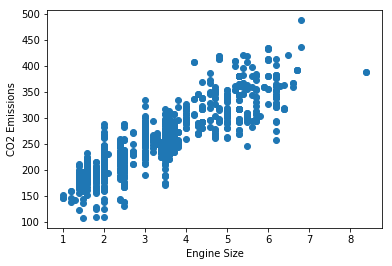

In [130]:
plt.scatter(modified_df.ENGINESIZE, modified_df.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

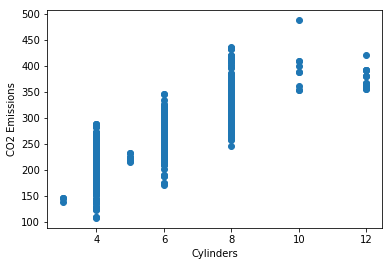

In [131]:
plt.scatter(modified_df.CYLINDERS, modified_df.CO2EMISSIONS)
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

# Create training and test data

## create a mask and apply that mask on data to get training and testing data

In [132]:
msk = np.random.rand(len(df))<0.8
len(msk)

1067

In [133]:
msk

array([False,  True,  True, ..., False,  True,  True])

In [134]:
training_data=modified_df[msk]
test_data=modified_df[~msk]

# Training data distribution

## Scatter plot between Engine Size and CO2 Emissions

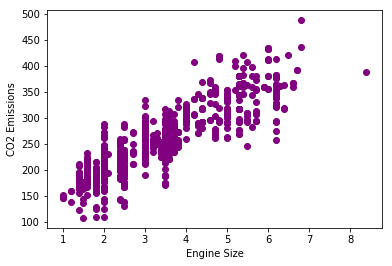

In [135]:
plt.scatter(training_data.ENGINESIZE, training_data.CO2EMISSIONS, color='purple')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

# Modeling

## Use scikit learn to train the data

### Import linear_model from sklearn

In [136]:
from sklearn import linear_model

### from linear_model get LinearRegression

In [137]:
regr=linear_model.LinearRegression()

In [138]:
X=training_data.loc[:,['ENGINESIZE']]
y=training_data.loc[:,['CO2EMISSIONS']]
type(X)

pandas.core.frame.DataFrame

# Use regr.fit to train the data with inputs and outputs

In [139]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [140]:
regr.coef_

array([[39.48792255]])

In [141]:
regr.intercept_

array([123.83617846])

Text(0,0.5,'regression line for training inputs in blue')

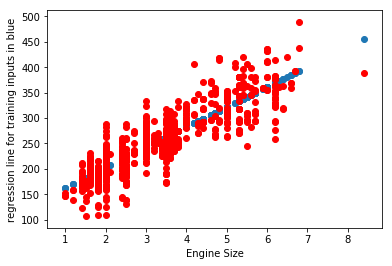

In [142]:
plt.scatter(X,regr.coef_[0][0]*X+regr.intercept_[0])
plt.scatter(X,y, color='red')
plt.xlabel('Engine Size')
plt.ylabel('regression line for training inputs in blue')

# Calculation of errors

In [143]:
test_X = test_data.loc[:,['ENGINESIZE']]
test_y=test_data.loc[:,['CO2EMISSIONS']]

test_predictions = regr.predict(test_X)

## Mean Absolute Error

In [144]:
np.mean(np.absolute(test_y-test_predictions))

CO2EMISSIONS    22.225982
dtype: float64

## Residual Sum of Squares | Mean Squared Error

In [145]:
np.mean((test_y-test_predictions)**2)

CO2EMISSIONS    847.571672
dtype: float64

## Root Mean Squared Error

In [146]:
np.sqrt(np.mean((test_y-test_predictions)**2))

CO2EMISSIONS    29.113084
dtype: float64